In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from WindPy import w
import empyrical
%matplotlib inline

In [5]:
w.start()

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2017 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


.ErrorCode=0
.Data=[OK!]

In [50]:
DATA_DIR = 'D:/Data/index'

In [51]:
df = pd.read_excel(u'../data/混合型FOF.xlsx')

In [52]:
df

,代码,名称,现价,涨跌,涨跌幅,成交金额,年初至今,时间
0,005218.OF,华夏聚惠稳健目标A,1.0092,0.0010,0.0010,0,0.0030,2018-01-04
1,005219.OF,华夏聚惠稳健目标C,1.0085,0.0009,0.0009,0,0.0029,2018-01-04
2,005221.OF,泰达宏利全能优选A,1.0058,0.0005,0.0005,0,0.0046,2018-01-04
3,005222.OF,泰达宏利全能优选C,1.0052,0.0004,0.0004,0,0.0044,2018-01-04
4,005217.OF,建信福泽安泰,1.0103,0.0003,0.0003,0,0.0035,2018-01-05
5,005157.OF,嘉实领航资产配置C,1.0041,0.0002,0.0002,0,0.0015,2018-01-04
6,005156.OF,嘉实领航资产配置A,1.0061,0.0002,0.0002,0,0.0017,2018-01-04
7,005216.OF,南方全天候策略C,1.0076,-0.0001,-0.0001,0,0.0022,2018-01-05
8,005215.OF,南方全天候策略A,1.0089,-0.0001,-0.0001,0,0.0023,2018-01-05
9,005220.OF,海富通聚优精选,1.0153,-0.0002,-0.0002,0,0.0166,2018-01-05


In [53]:
dic = {}
start_date, end_date = '2017-12-01', '2018-01-04'
for index in df.index:
    if df.loc[index][u'名称'].endswith('C'):
        continue
    else:
        wind_code = df.loc[index][u'代码']
        print wind_code
        data = w.wsd(wind_code, 'nav_adj', start_date, end_date)
        dic[wind_code] = pd.Series(data.Data[0], index=data.Times)

005218.OF
005221.OF
005217.OF
005156.OF
005215.OF
005220.OF


In [54]:
nav = pd.DataFrame(dic)

In [55]:
nav = nav.dropna()

In [56]:
nav.index = pd.to_datetime(nav.index)

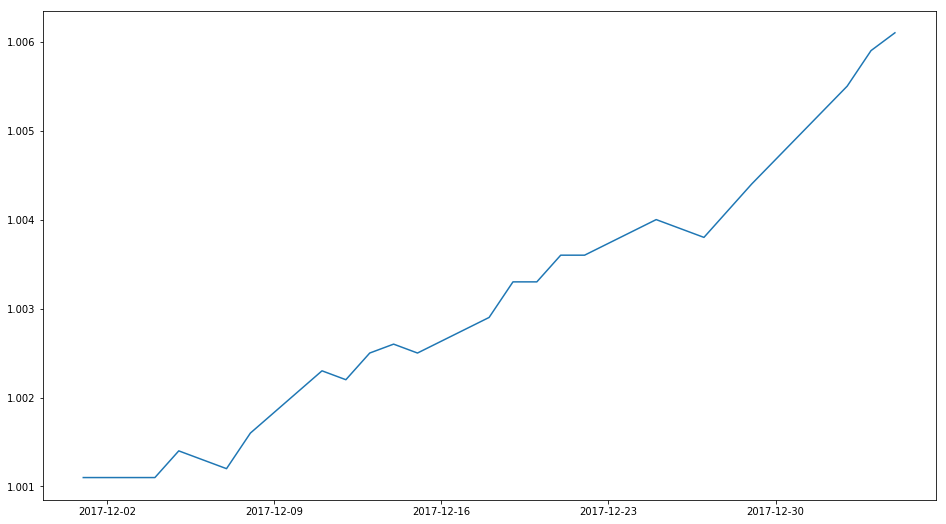

In [57]:
plt.figure(figsize=(16, 9))
plt.plot(nav['005156.OF'])

In [77]:
sector = pd.read_excel(u'D:/Data/list/板块指数.xlsx', index_col=0)
cor_df = pd.DataFrame(index=sector[u'名称'], columns=nav.columns)

In [78]:
for wind_code in sector.index:
    fname = '%s/%s.xlsx'%(DATA_DIR, wind_code)
    temp = pd.read_excel(fname, index_col=0)
    ret = temp.pct_change()
    ret = ret[(ret.index >= start_date) & (ret.index <= end_date)]['close']
    for col in nav.columns:
        series = nav[col].pct_change()
        cor_df.loc[sector.loc[wind_code, u'名称'], col] = (1+ret).cumprod().corr((1+series).cumprod())
    print sector.loc[wind_code, u'名称']

上证综指
上证50
沪深300
中证1000
中证100
中证500
中证800
中小板综
创业板综
深证综指
万得全A


In [79]:
cor_df.to_excel(u'../data/FOF-板块-corr.xlsx')

In [58]:
sector = pd.read_excel(u'D:/Data/list/板块指数.xlsx', index_col=0)
beta_df = pd.DataFrame(index=sector[u'名称'], columns=nav.columns)

In [60]:
for wind_code in sector.index:
    fname = '%s/%s.xlsx'%(DATA_DIR, wind_code)
    temp = pd.read_excel(fname, index_col=0)
    ret = temp.pct_change()
    ret = ret[(ret.index >= start_date) & (ret.index <= end_date)]['close']
    for col in nav.columns:
        series = nav[col].pct_change()
        beta_df.loc[sector.loc[wind_code, u'名称'], col] = empyrical.beta(series, ret)
    print sector.loc[wind_code, u'名称']

上证综指
上证50
沪深300
中证1000
中证100
中证500
中证800
中小板综
创业板综
深证综指
万得全A


In [61]:
beta_df

,005156.OF,005215.OF,005217.OF,005218.OF,005220.OF,005221.OF
名称,,,,,,
上证综指,0.0321626,0.0648395,0.068183,0.0477066,0.803139,0.181743
上证50,0.0212959,0.0404646,0.0419817,0.024558,0.511091,0.0940682
沪深300,0.0259707,0.0538837,0.052365,0.0344,0.68587,0.129295
中证1000,0.01029,0.0250151,0.0249717,0.0242315,0.284395,0.0871323
中证100,0.0218031,0.0439929,0.0426315,0.0270537,0.566918,0.101054
中证500,0.0154555,0.0371675,0.0349344,0.0306385,0.439175,0.112488
中证800,0.0275817,0.0588977,0.0568282,0.0398933,0.738405,0.149052
中小板综,0.0152904,0.0394154,0.0360615,0.0317232,0.473402,0.111479
创业板综,0.00951105,0.0238581,0.0242157,0.0224652,0.278188,0.0807257


In [62]:
beta_df.to_excel(u'../data/FOF-板块-beta.xlsx')

In [72]:
theme = pd.read_excel(u'D:/Data/list/板块指数.xlsx', index_col=0)
cor_df = pd.DataFrame(index=theme[u'名称'], columns=nav.columns)

In [74]:
for wind_code in theme.index:
    fname = '%s/%s.xlsx'%(DATA_DIR, wind_code)
    temp = pd.read_excel(fname, index_col=0)
    ret = temp.pct_change()
    ret = ret[(ret.index >= start_date) & (ret.index <= end_date)]['close']
    for col in nav.columns:
        series = nav[col].pct_change()
        cor_df.loc[theme.loc[wind_code, u'名称'], col] = (1+ret).cumprod().corr((1+series).cumprod())
    print theme.loc[wind_code, u'名称']

酒类指数
办公用品指数
食品指数
家居用品指数
机场指数
航空指数
家用电器指数
林木指数
保险指数
餐饮旅游指数
零售指数
制药指数
港口指数
电力指数
包装指数
农业指数
纺织服装指数
建筑指数
石油天然气指数
银行指数
陆路运输指数
燃气指数
化纤指数
贸易指数
文化传媒指数
工程机械指数
化肥农药指数
房地产指数
软饮料指数
多元金融指数
休闲用品指数
煤炭指数
日用化工指数
重型机械指数
能源设备指数
汽车零部件指数
化工原料指数
电工电网指数
发电设备指数
石油化工指数
航天军工指数
环保指数
医疗保健指数
工业机械指数
建材指数
电信指数
券商指数
公路指数
汽车指数
钢铁指数
生物科技指数
电子元器件指数
水务指数
商业服务指数
贵金属指数
海运指数
综合类指数
互联网指数
摩托车指数
基本金属指数
软件指数
半导体指数
精细化工指数
通信设备指数
电脑硬件指数
教育指数
造纸指数


In [76]:
cor_df.to_excel(u'../data/FOF-主题行业-corr.xlsx')

In [67]:
theme = pd.read_excel(u'D:/Data/list/主题行业.xlsx', index_col=0)
beta_df = pd.DataFrame(index=theme[u'名称'], columns=nav.columns)

In [66]:
for wind_code in theme.index:
    fname = '%s/%s.xlsx'%(DATA_DIR, wind_code)
    temp = pd.read_excel(fname, index_col=0)
    ret = temp.pct_change()
    ret = ret[(ret.index >= start_date) & (ret.index <= end_date)]['close']
    for col in nav.columns:
        series = nav[col].pct_change()
        beta_df.loc[theme.loc[wind_code, u'名称'], col] = empyrical.beta(ret, series)
    print theme.loc[wind_code, u'名称']

酒类指数
办公用品指数
食品指数
家居用品指数
机场指数
航空指数
家用电器指数
林木指数
保险指数
餐饮旅游指数
零售指数
制药指数
港口指数
电力指数
包装指数
农业指数
纺织服装指数
建筑指数
石油天然气指数
银行指数
陆路运输指数
燃气指数
化纤指数
贸易指数
文化传媒指数
工程机械指数
化肥农药指数
房地产指数
软饮料指数
多元金融指数
休闲用品指数
煤炭指数
日用化工指数
重型机械指数
能源设备指数
汽车零部件指数
化工原料指数
电工电网指数
发电设备指数
石油化工指数
航天军工指数
环保指数
医疗保健指数
工业机械指数
建材指数
电信指数
券商指数
公路指数
汽车指数
钢铁指数
生物科技指数
电子元器件指数
水务指数
商业服务指数
贵金属指数
海运指数
综合类指数
互联网指数
摩托车指数
基本金属指数
软件指数
半导体指数
精细化工指数
通信设备指数
电脑硬件指数
教育指数
造纸指数


In [65]:
beta_df.to_excel(u'../data/FOF-主题行业-beta.xlsx')

# 仓位变化（相关性）

In [168]:
for fund_code in nav.columns:
    print fund_code
    dic = {}
    for wind_code in sector.index:
        fname = '%s/%s.xlsx'%(DATA_DIR, wind_code)
        temp = pd.read_excel(fname, index_col=0)
        temp[fund_code] = nav[fund_code]
        temp = temp.dropna()
        ret = temp.pct_change()
        cor = ret.rolling(window=5).corr()
#         print sector.loc[wind_code][u'名称']
        dic[sector.loc[wind_code][u'名称']] = cor.unstack(level=1)['close'][fund_code]
    pos_df = pd.DataFrame(dic)
    pos_df.dropna().to_excel('../data/%s.xlsx'%(fund_code))

005156.OF
005215.OF
005217.OF
005218.OF
005220.OF
005221.OF


In [165]:
industry = pd.read_excel(u'D:/Data/list/中信一级行业.xlsx', index_col=0)

In [167]:
for fund_code in nav.columns:
    print fund_code
    dic = {}
    for wind_code in industry.index:
        fname = '%s/%s.xlsx'%(DATA_DIR, wind_code)
        temp = pd.read_excel(fname, index_col=0)
        temp[fund_code] = nav[fund_code]
        temp = temp.dropna()
        ret = temp.pct_change()
        cor = ret.rolling(window=5).corr()
#         print sector.loc[wind_code][u'名称']
        dic[industry.loc[wind_code][u'名称']] = cor.unstack(level=1)['close'][fund_code]
    pos_df = pd.DataFrame(dic)
    pos_df.dropna().to_excel('../data/%s.xlsx'%(fund_code))

005156.OF
005215.OF
005217.OF
005218.OF
005220.OF
005221.OF


# 仓位变化（比值）

In [170]:
for fund_code in nav.columns:
    print fund_code
    dic = {}
    for wind_code in industry.index:
        fname = '%s/%s.xlsx'%(DATA_DIR, wind_code)
        temp = pd.read_excel(fname, index_col=0)
        temp[fund_code] = nav[fund_code]
        temp = temp.dropna()
        ret = temp.pct_change()
        dic[industry.loc[wind_code][u'名称']] = ret[fund_code] / ret['close']
    pos_df = pd.DataFrame(dic)
    pos_df.dropna().to_excel('../data/%s.xlsx'%(fund_code))

005156.OF
005215.OF
005217.OF
005218.OF
005220.OF
005221.OF


# 建信FOF

In [171]:
df = pd.read_excel('D:/Data/fund/history/000478.OF.xlsx')

In [174]:
df['005217.OF'] = nav['005217.OF']

In [175]:
df = df.dropna()

In [177]:
df = df[['nav_adj', '005217.OF']]

In [180]:
ret_df = df.pct_change()

In [182]:
ret_df.tail()

,nav_adj,005217.OF
2017-12-28,0.005208,0.000696
2017-12-29,0.007793,0.000596
2018-01-02,0.013554,0.001689
2018-01-03,0.010941,0.000992
2018-01-04,0.006096,0.000495


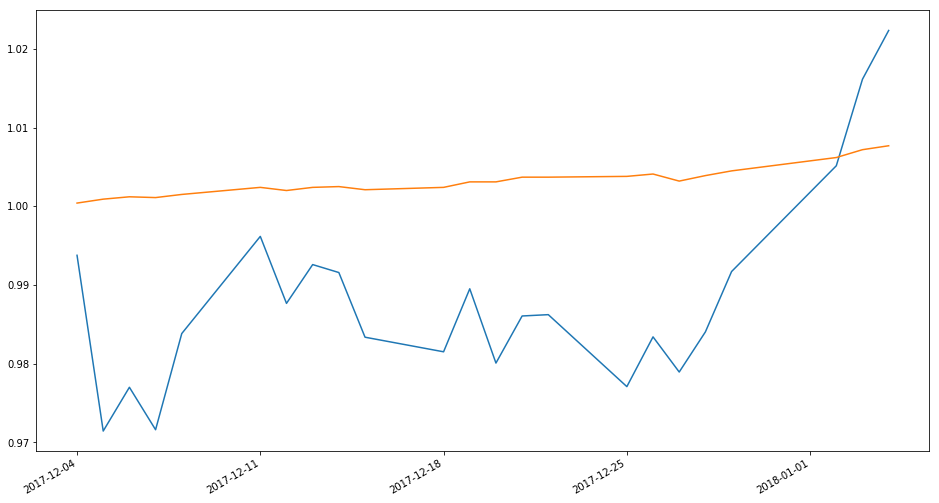

In [189]:
plt.figure(figsize=(16, 9))
(1 + ret_df['nav_adj']).cumprod().plot()
(1 + ret_df['005217.OF']).cumprod().plot()